In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX 
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Reading Dataframe
df = pd.read_csv('/Users/devonmarcus/Data Science Bootcamp/Ticketmaster Project/data/Event_Information_Dataframe_Part_3.csv', sep='\t')

In [3]:
# Dropping Uneccessary Columns
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Multiple_Days", axis=1, inplace=True)
df.drop("ID", axis=1, inplace=True)
df.drop("Type", axis=1, inplace=True)
df.drop("Venue_Type", axis=1, inplace=True)

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

In [4]:
# Fixing Row Errors
df['Venue_City'] = df['Venue_City'].replace(to_replace='" Minneapolis"', value='"Minneapolis"')
df['Venue_City'] = df['Venue_City'].replace(to_replace='"Montr\\u00e9al"', value='"Montreal"')
df['Venue_City'] = df['Venue_City'].replace(to_replace='"Qu\u00e9bec"', value='"Quebec"')
df['Venue_City'] = df['Venue_City'].replace(to_replace='"New York City"', value='"New York"')
df = df.applymap(lambda x: x.strip('"') if isinstance(x, str) else x)

In [5]:
#Dropping Outlier Rows Based on Quarantile and Date
df.drop(df[df['Price_Ranges_Min'] > df["Price_Ranges_Min"].quantile(0.96)].index, inplace = True)
df.drop(df[df['Price_Ranges_Max'] > df["Price_Ranges_Max"].quantile(0.96)].index, inplace = True)
df.drop(df[df['Price_Ranges_Min'] < df["Price_Ranges_Min"].quantile(0.04)].index, inplace = True)
df.drop(df[df['Price_Ranges_Max'] < df["Price_Ranges_Max"].quantile(0.04)].index, inplace = True)
df = df[~(df['Date'] < '2022-08-06')]
df = df[~(df['Date'] > '2023-08-06')]

In [6]:
# Creating Average Price Column
col = df.loc[: , "Price_Ranges_Max":"Price_Ranges_Min"]
df['Price_Ranges_Avg'] = col.mean(axis=1)
df.shape

(26720, 56)

Music             13481
Arts & Theatre     9095
Sports             2674
Miscellaneous      1394
Film                 76
Name: Segment_Home, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


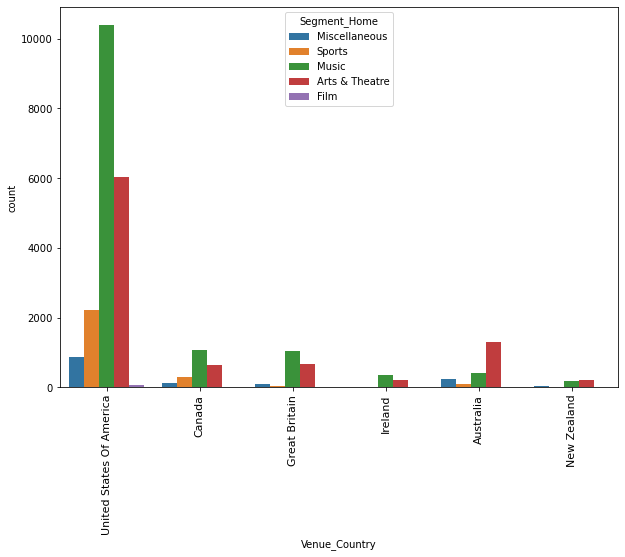

In [7]:
# Representation of Segments Based On Country
plt.figure(figsize=(10, 7))
plt.xticks(fontsize=11, rotation=90)

print(df['Segment_Home'].value_counts())
print(sns.countplot(data= df, x = 'Venue_Country',hue='Segment_Home'))

In [8]:
# Filter Only Music Segments

pd.set_option("display.max_rows", None)
df_Time_Series_1 = df.loc[(df['Segment_Home'] == 'Music')]


## Time Series

<AxesSubplot:>

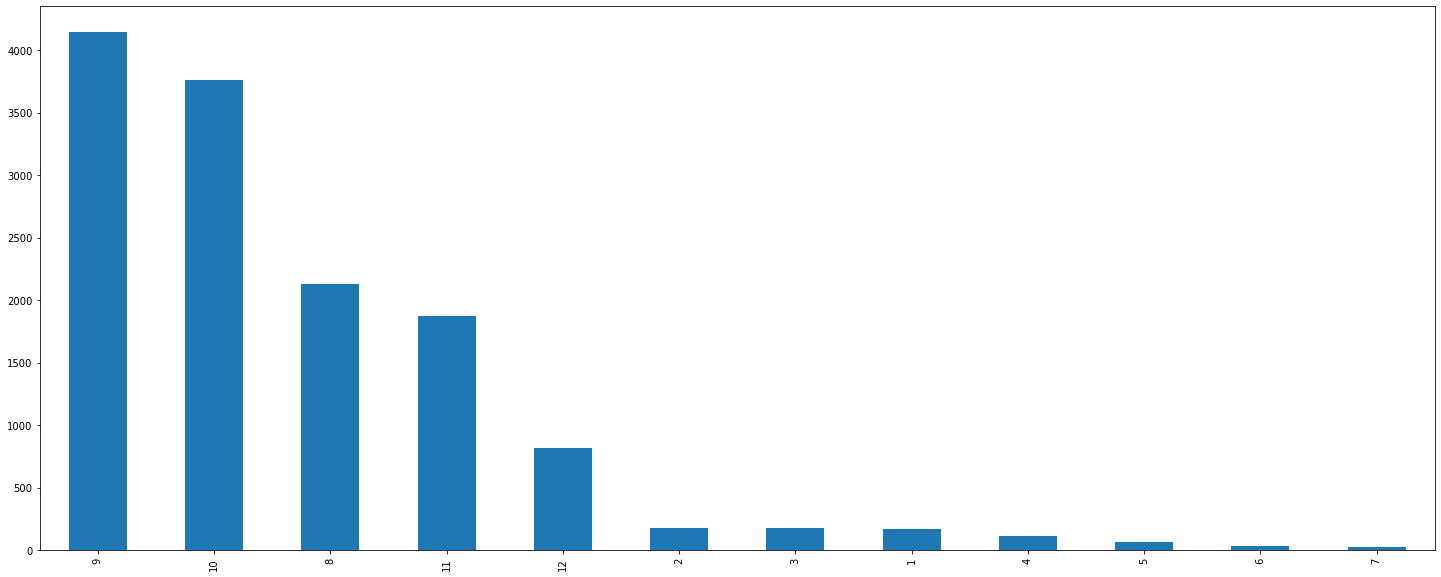

In [9]:
plt.figure(figsize=(25, 10))
df_Time_Series_1['Month'].value_counts().plot(kind='bar')

In [10]:
# Performing Time Series Data Manipulation 
df_Time_Series_1 = df.iloc[: , [53,55]]
df_Time_Series_1 = df_Time_Series_1.groupby(['Date']).mean()

df_Time_Series_1 = df_Time_Series_1.reset_index().sort_values('Date')
df_Time_Series_1['Date'] = pd.to_datetime(df_Time_Series_1['Date'], infer_datetime_format=True)

df_Time_Series_1 = df_Time_Series_1.set_index('Date')

pd.set_option('display.max_rows', None)
df_Time_Series_1 = df_Time_Series_1.asfreq('D')
df_Time_Series_1 = df_Time_Series_1.fillna(df_Time_Series_1["Price_Ranges_Avg"].quantile(0.50))
df_Time_Series_1

,Price_Ranges_Avg
Date,
2022-08-13,86.006762
2022-08-14,82.484292
2022-08-15,86.259680
2022-08-16,82.455041
2022-08-17,83.108959
2022-08-18,82.927387
2022-08-19,81.005739
2022-08-20,84.352417
2022-08-21,82.470638


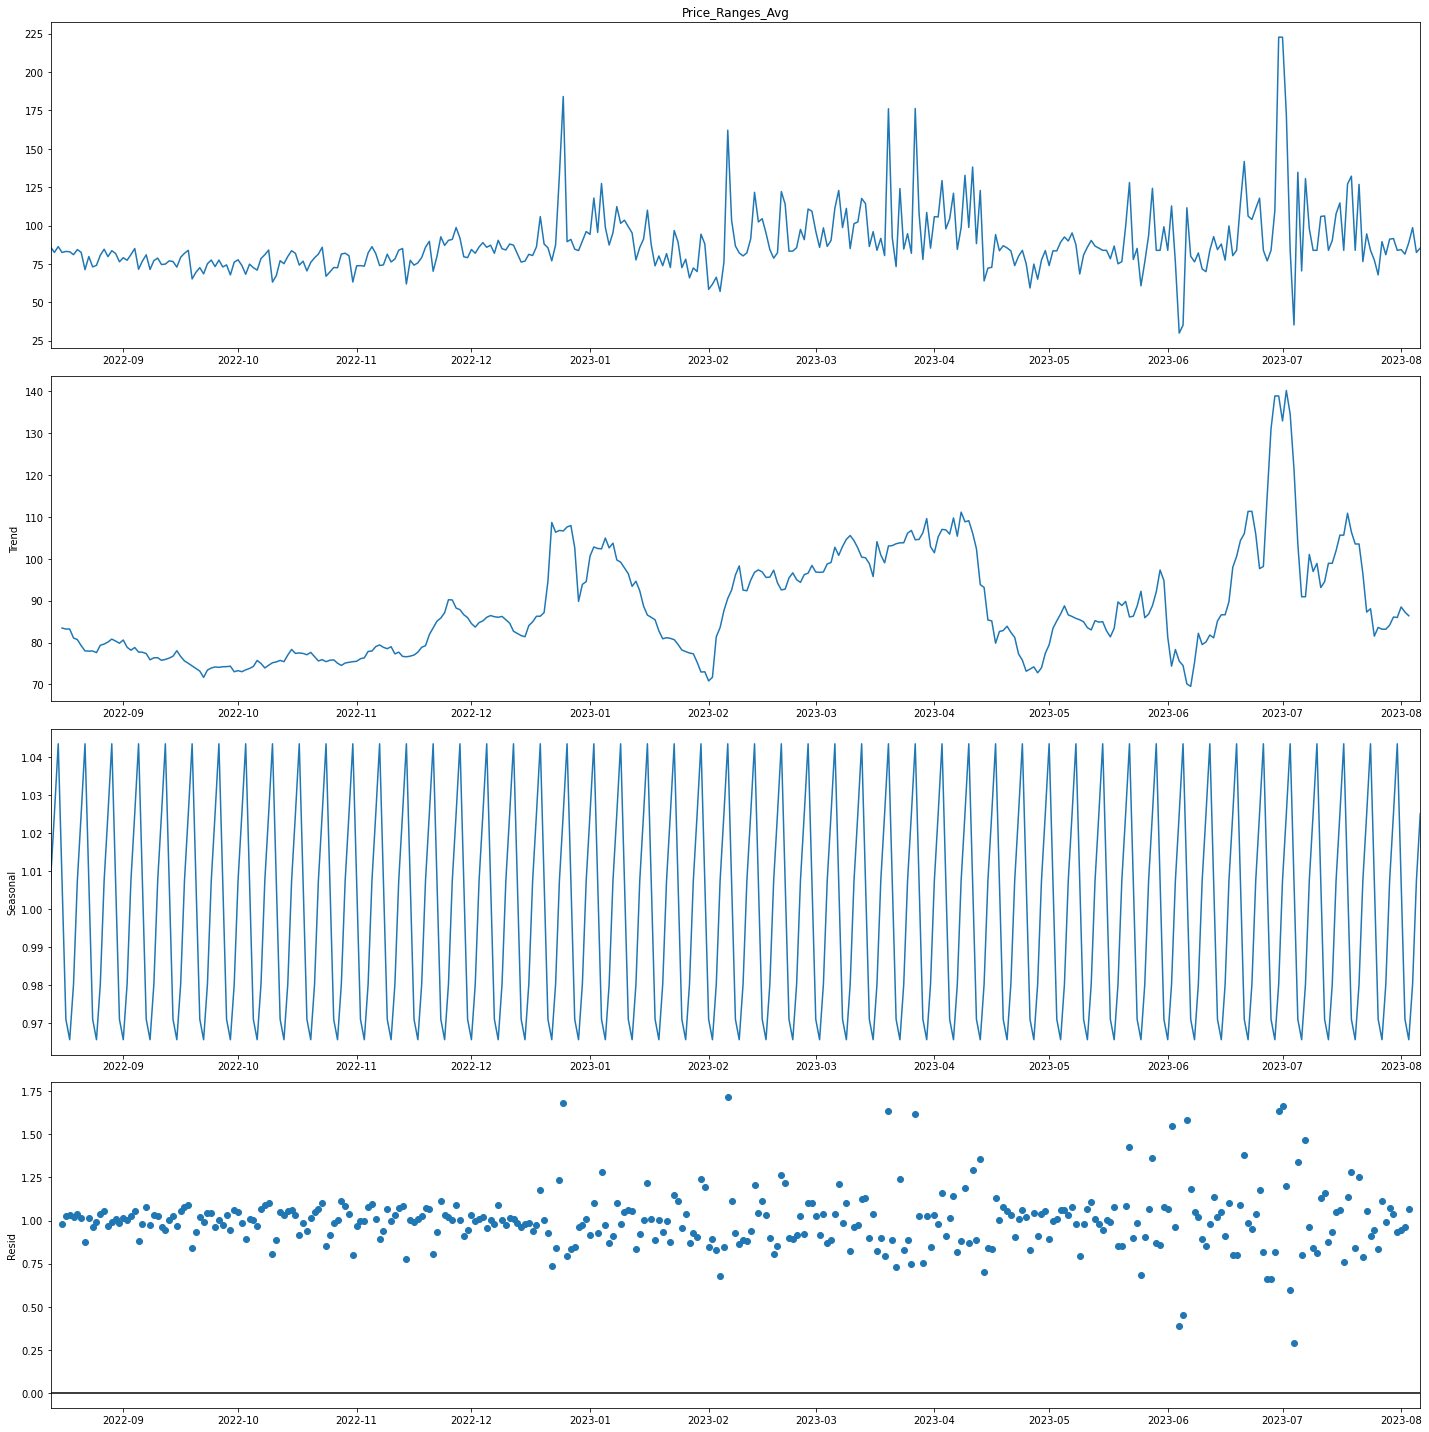

In [11]:
# Seasonal Decompose Graphs

from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc("figure",figsize=(20,20))
seasonal_decompose = seasonal_decompose(df_Time_Series_1['Price_Ranges_Avg'],model='mul',).plot();


<AxesSubplot:xlabel='Date'>

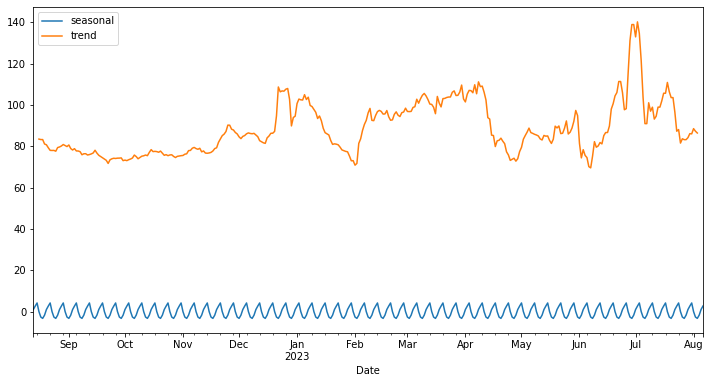

In [12]:
# Isolating Trend From Seasonal Decompose
s=sm.tsa.seasonal_decompose(df_Time_Series_1['Price_Ranges_Avg'])
s.seasonal.plot(legend=True,figsize=(12,6))
s.trend.plot(legend=True,figsize=(12,6))


In [13]:
# Two functions to help better interpret ADF and KPSS results (via Statsmodels Documentation) 

from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    print('\n')
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    print('\n')
    
    if dfoutput['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has no unit root & is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has unit root and is non-stationary')
        
##############################################################
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    print('\n')
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print('\n')
    
    if kpss_output['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has unit root and is non-stationary')
    else:        
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has no unit root & is stationary')

In [14]:
print(adf_test(df_Time_Series_1['Price_Ranges_Avg']))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(kpss_test(df_Time_Series_1['Price_Ranges_Avg']))

Results of Dickey-Fuller Test:


Test Statistic                  -2.633086
p-value                          0.086350
#Lags Used                      13.000000
Number of Observations Used    345.000000
Critical Value (1%)             -3.449447
Critical Value (5%)             -2.869954
Critical Value (10%)            -2.571253
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
None
~~~~~~~~~~~~~~~~~~~~~~~~~~
Results of KPSS Test:


Test Statistic           1.258033
p-value                  0.010000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has unit root and is non-stationary
None


In [15]:
auto_arima(df_Time_Series_1['Price_Ranges_Avg'],trace=True,start_p=1, d=None, start_q=1, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=3, max_D=2, max_Q=3, max_order=5, m=7, seasonal=True).summary()



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=3259.306, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=3204.950, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=3142.557, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=3257.306, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=3155.214, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=3135.449, Time=0.30 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=3139.597, Time=0.16 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=3136.874, Time=0.54 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=3136.845, Time=0.62 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=3140.240, Time=0.41 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=3139.062, Time=0.30 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=3232.055, Time=0.23 sec
 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  359
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1547.446
Date:                           Thu, 18 Aug 2022   AIC                           3104.893
Time:                                   11:06:25   BIC                           3124.295
Sample:                                        0   HQIC                          3112.609
                                           - 359                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3619      0.027     13.438      0.000       0.309       0.415
ma.L1         -0.9833      0.010    -97.767      0.000      -1.003      -0.964
ar.S.L7        0.7149      0.106      6.744      0.000       0.507       0.923
ma.S.L7       -0.4948      0.133     -3.714      0.000      -0.756      -0.234
sigma2       330.1670     10.871     30.371      0.000     308.860     351.474
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1561.00
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              22.83   Skew:                             1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
train = df_Time_Series_1.iloc[:280] 
test = df_Time_Series_1.iloc[280:]

77.1680199874551
78.51521320923818


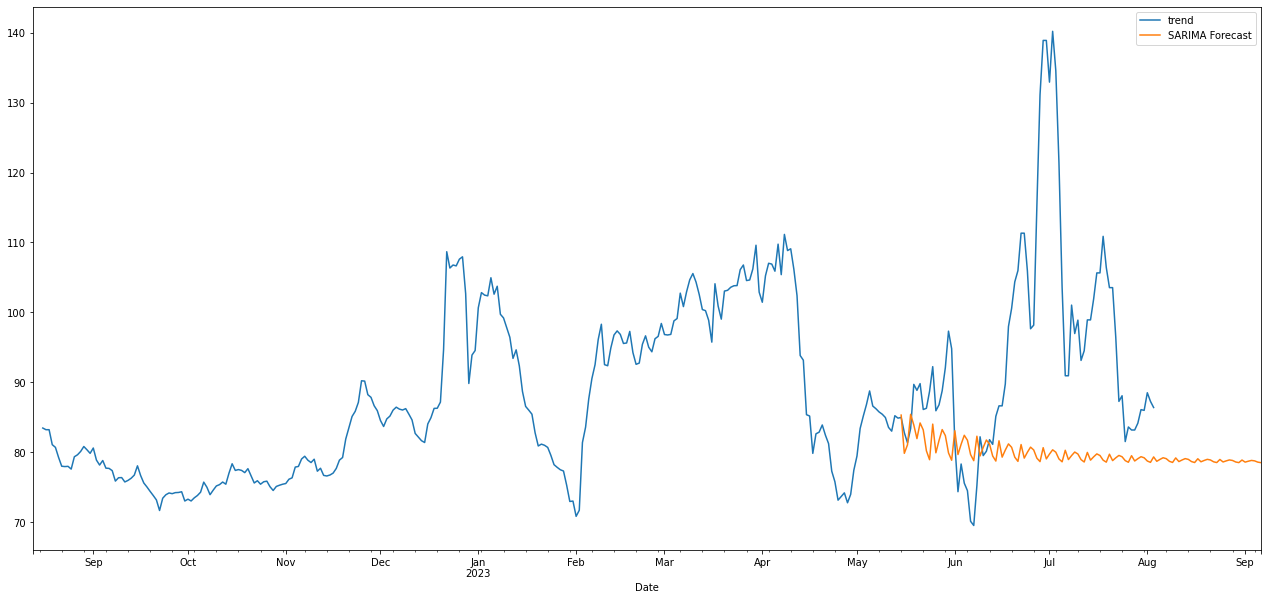

In [17]:
model = SARIMAX(train['Price_Ranges_Avg'], order=(1,1,1), seasonal_order=(1,0,1,7)).fit(disp=0)

forecast = model.predict(start=len(df_Time_Series_1)-84, end=len(df_Time_Series_1)+30, typ='levels').rename('SARIMA Forecast')
df_Time_Series_2 = df_Time_Series_1.iloc[:100] 
print(df_Time_Series_2['Price_Ranges_Avg'].mean())
print(forecast[-1])
s.trend.plot(legend=True,figsize=(22,10))
forecast.plot(legend=True);

In [18]:
df.to_csv('Event_Information_Dataframe_Part_4.csv', index=True, sep="\t")